# Laboratorio 3
## Pablo Escobar
## Eduardo Ramirez 19946

In [26]:
from pandas import read_csv
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [27]:
# path to the csv file relative to the notebook
file_path = "monthly-sunspots.csv"

# read the data
df = read_csv(file_path)
df.head()


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [28]:
df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


In [29]:
# show missing values
missing_values_count = [col for col in df.columns if df[col].isnull().sum() > 0]
print(missing_values_count)

[]


# FEED FORWARD NN

In [30]:


data = pd.read_csv(file_path) 
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]))
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

X = data[['Year', 'Month']]
y = data['Sunspots']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(8, activation='relu'),  
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))
loss = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)
predictions1 = model.predict(X_test_scaled)

Epoch 1/100
71/71 [==============================] - 2s 5ms/step - loss: 3221.1829 - val_loss: 1809.2576
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 1812.3636 - val_loss: 1810.4065
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 1825.1613 - val_loss: 1810.9669
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 1781.8860 - val_loss: 1787.6583
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 1780.5720 - val_loss: 1752.1570
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 1765.6865 - val_loss: 1747.5767
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 1761.0597 - val_loss: 1747.6691
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 1769.2061 - val_loss: 1758.1371
Epoch 9/100
71/71 [==============================] - 0s 3ms/step - loss: 1761.2166 - val_loss: 1744.1874
Epoch 10/100
71/71 [==============================] - 0

# RNN

In [31]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential([
        SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]),
        Dense(units=dense_units, activation=activation[1])
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [32]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = df.values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data, data

In [33]:
train_data, test_data, data = get_train_test(file_path)

In [34]:
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    X = []
    for i in range(len(Y)):
        start = i*time_steps
        end = start + time_steps
        X.append(dat[start:end])
    X = np.array(X).reshape(len(Y), time_steps, 1)
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [35]:
model = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.2724 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0737 - 308ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0429 - 294ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0262 - 294ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0141 - 346ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0083 - 301ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0070 - 294ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0064 - 313ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0062 - 294ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0056 - 298ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0054 - 303ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0051 - 293ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0050 - 323ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0049 - 288ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0048 - 279ms/epoch - 1ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [36]:
def print_error(trainY, testY, train_predict, test_predict):    
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 3ms/step
Train RMSE: 0.067 RMSE
Test RMSE: 0.113 RMSE


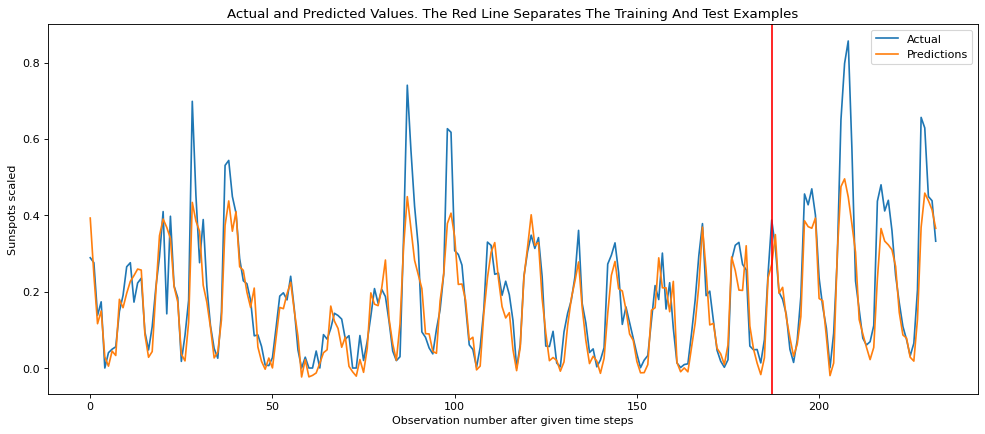

In [37]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

# LSTM

In [38]:
df = read_csv(file_path)
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [39]:
# convert Month date toi datetime
df['Month'] = pd.to_datetime(df['Month'])
# df.set_index('Month', inplace=True)
df.head()


,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


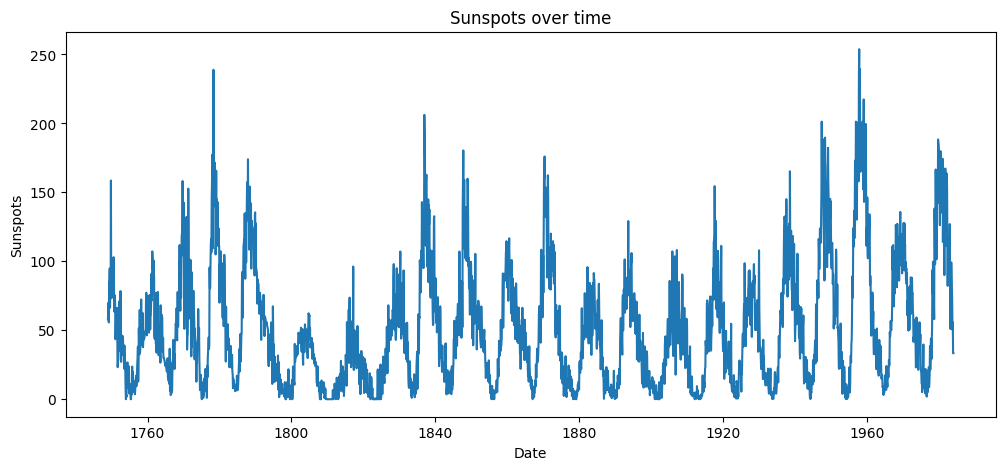

In [40]:
values = df['Sunspots'].values
# graph the values and set the dates as the x axis
plt.figure(figsize=(12, 5))
plt.plot(df['Month'], values)
plt.title('Sunspots over time')
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.show()


In [41]:
train_data, test_data, data = get_train_test(file_path)

In [42]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

Epoch 1/50
3/3 - 3s - loss: 0.1417 - val_loss: 0.2041 - 3s/epoch - 867ms/step
Epoch 2/50
3/3 - 0s - loss: 0.1071 - val_loss: 0.1518 - 58ms/epoch - 19ms/step
Epoch 3/50
3/3 - 0s - loss: 0.0818 - val_loss: 0.1114 - 52ms/epoch - 17ms/step
Epoch 4/50
3/3 - 0s - loss: 0.0671 - val_loss: 0.0894 - 60ms/epoch - 20ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0651 - val_loss: 0.0857 - 57ms/epoch - 19ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0649 - val_loss: 0.0813 - 58ms/epoch - 19ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0578 - val_loss: 0.0779 - 52ms/epoch - 17ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0519 - val_loss: 0.0756 - 53ms/epoch - 18ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0511 - val_loss: 0.0741 - 52ms/epoch - 17ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0497 - val_loss: 0.0716 - 54ms/epoch - 18ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0468 - val_loss: 0.0719 - 54ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0464 - val_loss: 0.0757 - 54ms/epoch - 18ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0469 - val_loss: 0.

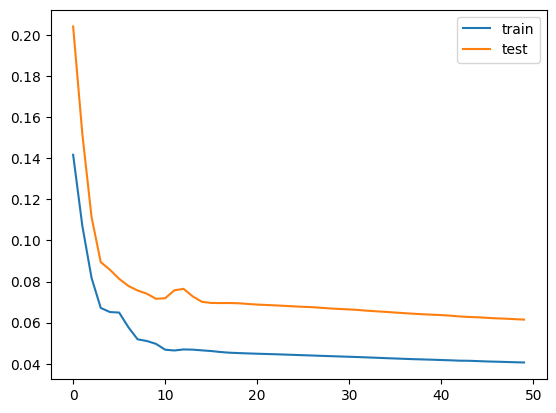

In [43]:
from tensorflow.python.keras.layers.recurrent import LSTM
from matplotlib import pyplot
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainX, trainY, epochs=50, batch_size=72, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

6/6 [==============================] - 0s 3ms/step


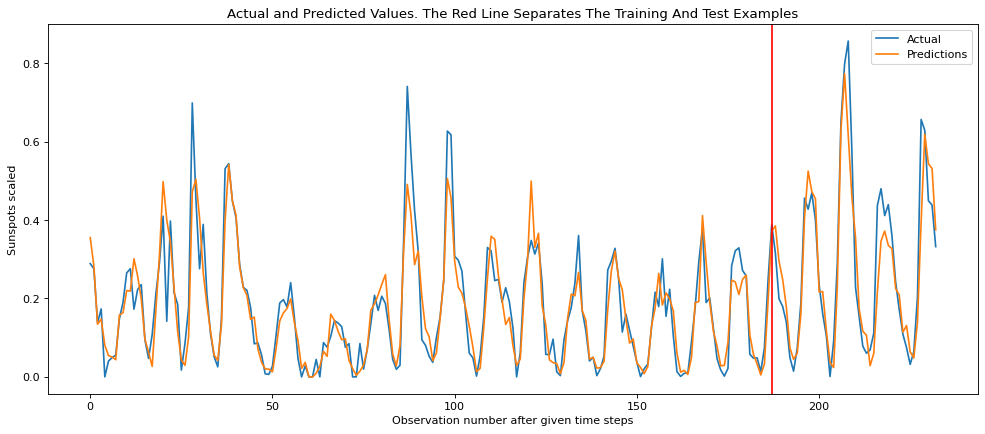

In [44]:
test_predict = model.predict(testX)
train_predict = model.predict(trainX)
real = testY


plot_result(trainY, testY, train_predict, test_predict)
